In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("/content/telecom chrn(1).csv")


In [5]:
# Check the distribution of the target variable 'Churn'
print("\nDistribution of Churn:")
print(df["Churn"].value_counts())


Distribution of Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# Get descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


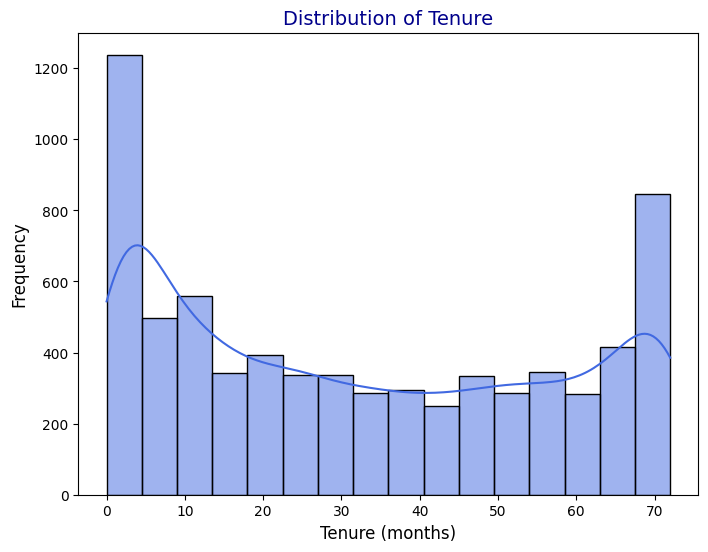

In [8]:
# Distribution of Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', kde=True, color='royalblue')
plt.title('Distribution of Tenure', fontsize=14, color='darkblue')
plt.xlabel('Tenure (months)', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.show()

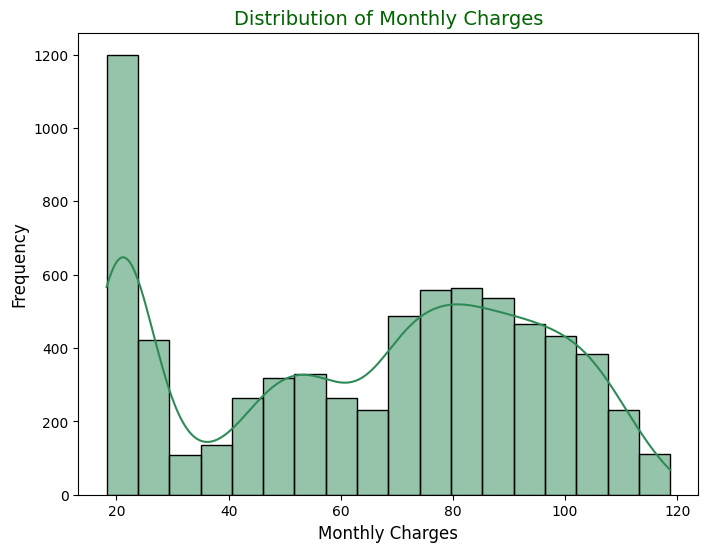

In [9]:
# Distribution of Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='MonthlyCharges', kde=True, color='seagreen')
plt.title('Distribution of Monthly Charges', fontsize=14, color='darkgreen')
plt.xlabel('Monthly Charges', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.show()


'TotalCharges' column could not be converted to numeric for plotting.


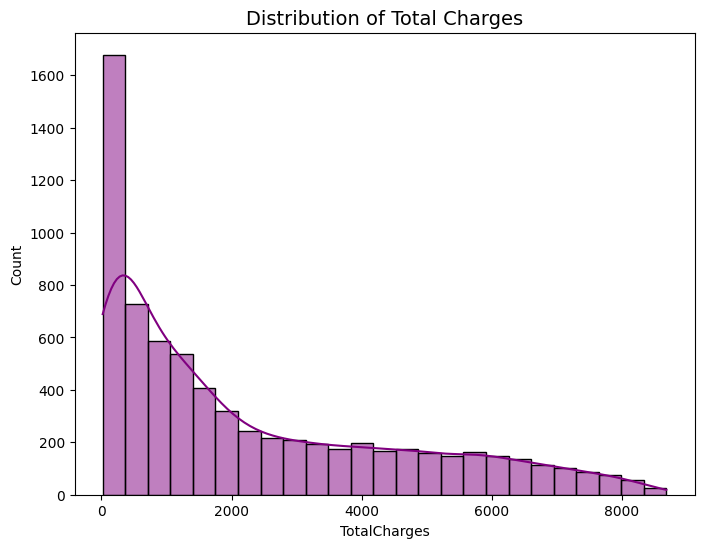

In [10]:
# Distribution of Total Charges
try:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df.dropna(), x='TotalCharges', kde=True, color='purple') # Drop NaN for plotting
    plt.title('Distribution of Total Charges', fontsize=14, color='darkpurple')
    plt.xlabel('Total Charges', fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')
    plt.show()
except ValueError:
    print("\n'TotalCharges' column could not be converted to numeric for plotting.")

<ipython-input-11-3248936013>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')  # Using Seaborn palette


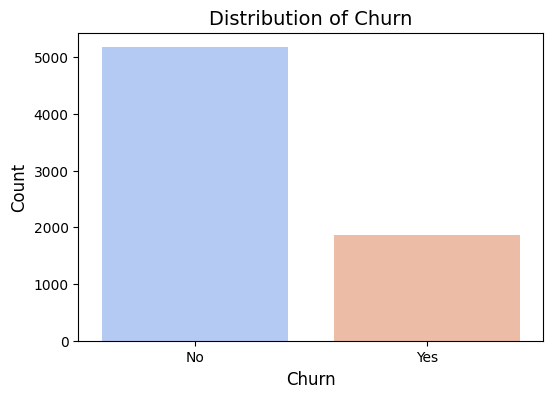

In [11]:
# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')  # Using Seaborn palette
plt.title('Distribution of Churn', fontsize=14, color='black')
plt.xlabel('Churn', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.show()


<ipython-input-12-4213790088>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Contract', palette='Set2')  # Using Set2 color scheme


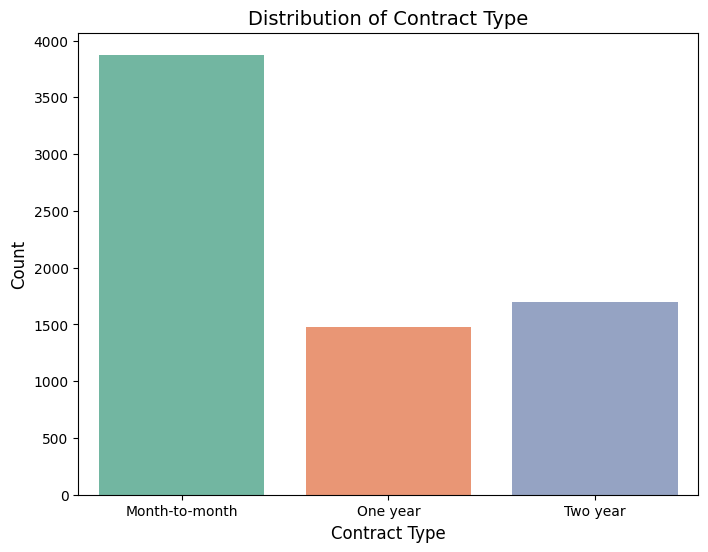

In [12]:
# Distribution of Contract Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', palette='Set2')  # Using Set2 color scheme
plt.title('Distribution of Contract Type', fontsize=14, color='black')
plt.xlabel('Contract Type', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')
plt.show()

<ipython-input-13-1338318925>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Spectral')


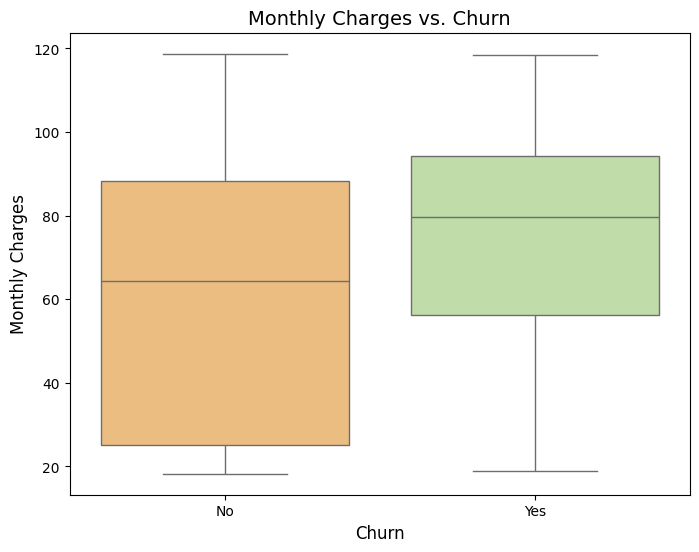

In [13]:
# Monthly Charges vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Spectral')
plt.title('Monthly Charges vs. Churn', fontsize=14, color='black')
plt.xlabel('Churn', fontsize=12, color='black')
plt.ylabel('Monthly Charges', fontsize=12, color='black')
plt.show()

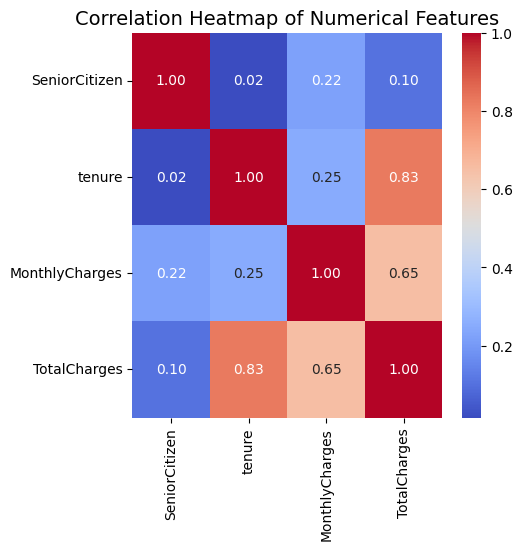

In [15]:
# Correlation Heatmap with Colors
plt.figure(figsize=(5, 5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, color='black')
plt.show()


In [16]:
# Handle missing values (example: fill TotalCharges missing values with the mean)
if df['TotalCharges'].isnull().sum() > 0:
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
    print("\nFilled missing 'TotalCharges' values with the mean.")



Filled missing 'TotalCharges' values with the mean.


<ipython-input-16-1746320174>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [18]:
# Define target variable (y) and features (X)
y = df['Churn']
X = df.drop(['customerID', 'Churn'], axis=1)

In [19]:
oe = OrdinalEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = oe.fit_transform(X[categorical_cols])

In [20]:
y.value_counts()

,count
Churn,
No,5174
Yes,1869


In [21]:
ros = RandomOverSampler(random_state=2529)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [22]:
y_resampled.value_counts()

,count
Churn,
No,5174
Yes,5174


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=2529)


In [24]:
dtc = DecisionTreeClassifier(random_state=2529)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2529)

In [25]:
y_pred = dtc.predict(X_test)

In [27]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.77      0.84      1290
         Yes       0.80      0.93      0.86      1297

    accuracy                           0.85      2587
   macro avg       0.86      0.85      0.85      2587
weighted avg       0.86      0.85      0.85      2587

